In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
"""Tal como el codigo visto en clases, usamos la cuadratura adaptativa"""
class MaxIterations(Exception):
    pass

def adaptive(f, a, b, tol, N=100000):
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): 
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

In [5]:
"""creamos el error gaussiano y calculamos la integral"""
error=random.gauss(0, 10**-5) 

In [7]:
adaptive(lambda x: np.sin(x)+error, 0, 1, 0.00000001)

0.45971092787962076

In [8]:
"""de la expresión vista en clases podemos obtener el error, el cual nos queda como
Σ(j = 1, n/2) de (h^5/(16*90))p^4 (ξj). De esta forma definimos una funcion del error"""
def error(h):
    v1=0
    valor=int(1/(2*h))
    for i in range(1,valor+1):
        v1=v1+(1/(16*90))*(h**(5))*np.sin(i)
    return v1 

Text(0, 0.5, 'error')

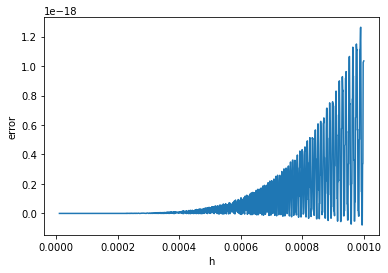

In [9]:
"""graficamos""" 
h1 = np.linspace(0.00001,0.001,1000)
plt.plot(h1, [error(xi) for xi in h1] )
plt.xlabel('h')
plt.ylabel('error')

In [ ]:
""" para un h grandes el error aumenta drasticamente pero se puede lograr una precisión particular de 10**-7 con un h pequeño. 
A partir de la oscilaciones del error vemos que este crece de manera muy rapida"""

# Calificación: 5.0

Comparaste con el error numérico dado por la teoría. Se pedía comparar con el error obtenido en la integración (diferencia entre solución numérica y exacta). Esto es porque se quería tomar en cuenta el efecto del error aleatorio introducido, que no está considerado en la expresión teórica.